# Importance resampling

#### Motivating Examples

The main assumption in simulation methods usually is that we can always generate sequences on any length that are "statistically" similar sequence of samples of indepndent random uniform distribution in the interval $[0,1]$. Starting from this there are methods to generate other random variables. The inverse CDF method and acceptance-rejection sampling are notebly the most well-kown to get independent samples given the density of a distribution. Here we will discuss another method called importance resamling. We will later discuss briefly the compare it with these methods. We will demonestrate the idea of importance resampling by the following simple example.

Suppose we would like to sample for the distribution with the density $\rho(x)=2x\mathbb{1}_{[0,1]}(x)$. This density can easily be sampled from using inverse CDF however, we will use it demonestrate importance resmpling. Let $X_1,X_2,....,X_n$ be samples from $\textrm{Uniform}(0,1)$. The samples $X_1,X_2,....,X_n$ are equally distributed in the interval $[0,1]$. In this example importance resampling will remove the samples that are close to $0$ since $\rho$ is tiny near $0$ and similarly it will repeat the values that are closer to $1$. Importance resampling specifies how many samples to keep by calculating an "importance weight" for every $X_i$. The ones with higher weights gets "resampled" more often than the ones with smaller importance weights. 

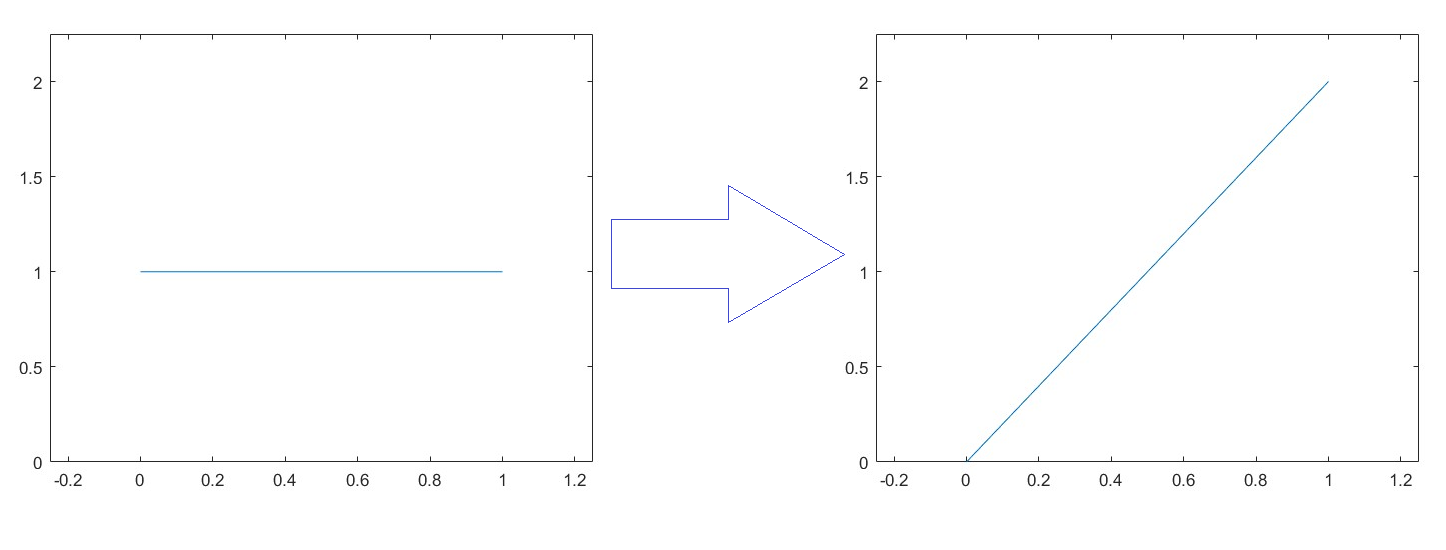

#### Algorithm: Importance resampling from uniform distribution  
1- Generate samples $X_1,..,X_n$ from $\textrm{Uniform}(0,1)$.  
2- Calculate the importance weights $w_i=\rho(X_i)$.  
3- Calculate the normalized wights $W_i = w_i/\sum_{i=1}^n w_i$.  
4- Generate samples $A_1,...,A_n$ from $\textrm{Multinomial}((W_i)_{i=1}^n)$.  
5- Define $Y_i = X_{A_i}$.  

The samples $Y_i$ are approximate samples from $\rho$.

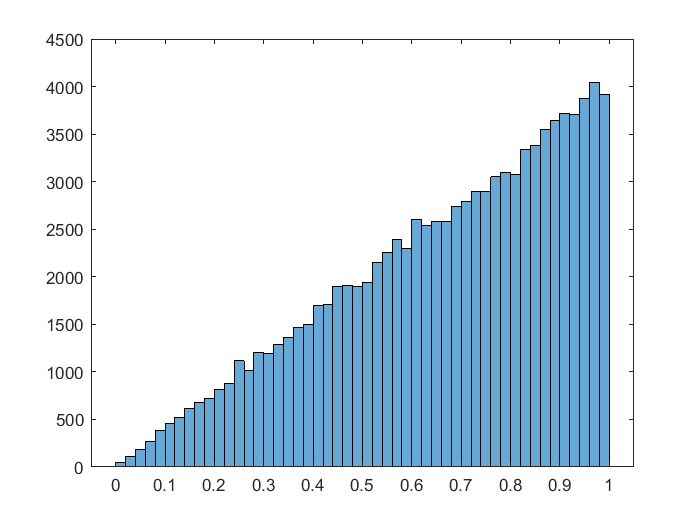

In [1]:
n = 100000;
X = rand(n,1);
rho = @(x) x.*(0 <= x & x <= 1);    % no need for the normalizing constant 2. Why?
w = rho(X);
W = w/sum(w);
A = randsample(n,n,true, W);
Y = X(A);
histogram(Y)

Another example: We sample from the density $\rho(x) = (\cos(6\pi x)+1)\mathbb{1}_{[0,1]}(x)$.

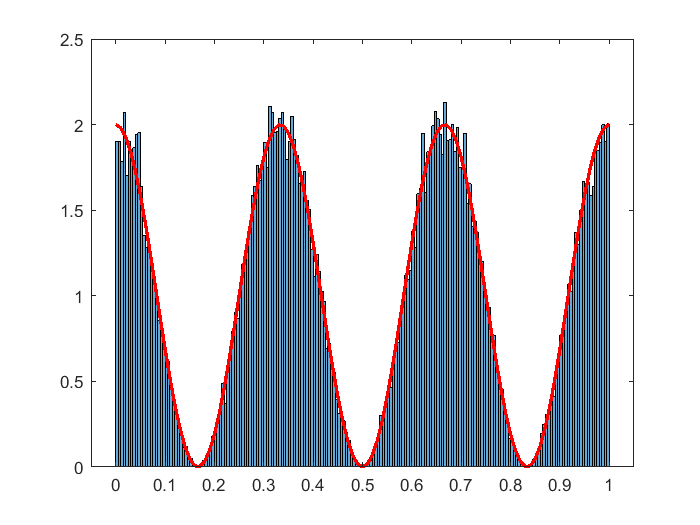

In [20]:
n = 100000;
X = rand(n,1);
rho = @(x) (cos(6*pi*x)+1).*(0 <= x & x <= 1);
w = rho(X);
W = w/sum(w);
A = randsample(n,n,true, W);
Y = X(A);

histogram(Y,200, 'Normalization', 'pdf')

% plotting pdf
hold on;
points = 0:0.01:1;
plot(points, cos(6*pi*points)+1, 'r', 'LineWidth', 2)
hold off;

The samples $Y$ have many repeated element from $X$, consequently the samples are not independent. By sacrificing some of the samples from $X$ we can have independent samples.

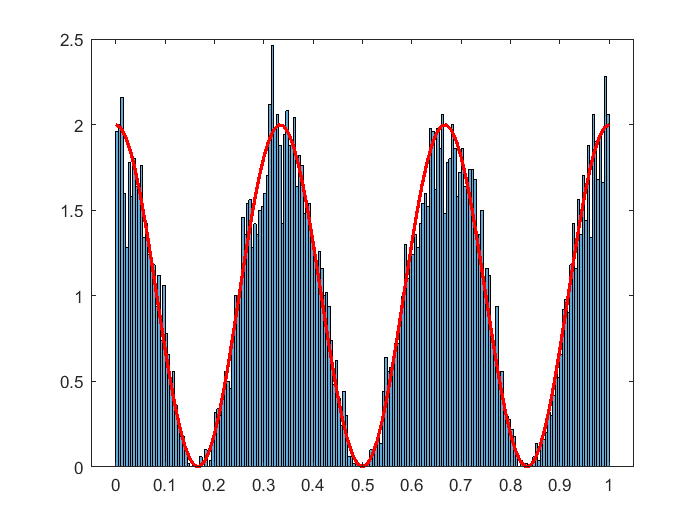

In [25]:
n = 100000;
X = rand(n,1);
rho = @(x) (cos(6*pi*x)+1).*(0 <= x & x <= 1);
batch_size = 10;
Y = zeros(n/batch_size, 1);
for i = 1:n/batch_size
    X_batch = X((i-1)*batch_size+1:i*batch_size);
    w = rho(X_batch);
    W = w/sum(w);
    A = randsample(batch_size,1,true, W);
    Y(i) = X_batch(A);
end
histogram(Y,200, 'Normalization', 'pdf')

% plotting pdf
hold on;
points = 0:0.01:1;
plot(points, cos(6*pi*points)+1, 'r', 'LineWidth', 2)

Another way to reduce the dependence between the samples $Y$ is to sample less than $n$ samples. 

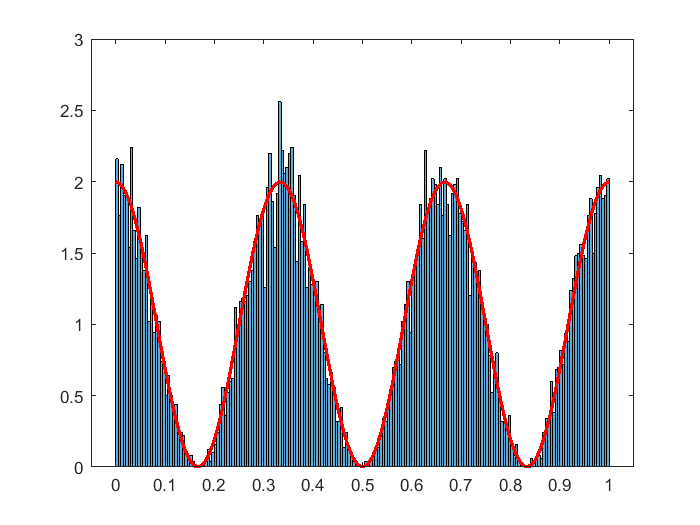

In [26]:
n = 100000;
m = n/10;
X = rand(n,1);
rho = @(x) (cos(6*pi*x)+1).*(0 <= x & x <= 1);
w = rho(X);
W = w/sum(w);
A = randsample(n,m,true, W);
Y = X(A);

histogram(Y,200, 'Normalization', 'pdf')

% plotting pdf
hold on;
points = 0:0.01:1;
plot(points, cos(6*pi*points)+1, 'r', 'LineWidth', 2)
hold off;

It is straight forward to generalize to other distributions: Let $\pi$ be the density of a distribution. 
#### Algorithm: Importance resampling  
1- Generate samples $X_1,..,X_n\sim \pi$.  
2- Calculate the importance weights $w_i=\rho(X_i)/\pi(X_i)$.  
3- Calculate the normalized wights $W_i = w_i/\sum_{i=1}^n w_i$.  
4- Generate independent samples $A_1,...,A_n$ from $\textrm{Multinomial}((W_i)_{i=1}^n)$.  
5- Define $Y_i = X_{A_i}$.  

**Algorithm claim:** $Y_i$ are approximate samples from the distribution $\rho$.

**Remark:** $ \mathbb{P}[A_i=j|X_1,...,X_n] = W_j $

#### Proof of the algorithm claim:
Let $f:\mathbb{R}\rightarrow\mathbb{R}$ be a bounded measurable function. Recall the inmportance sampling identity
$$\mathbb{E}\left[f(X_j)\frac{\rho(X_j)}{\pi(X_j)}\right]=\int f(x)\frac{\rho(x)}{\pi(x)}\pi(dx) = \int f(x)\rho(dx)$$
Equipped with this identity and the remark above we write
$$ \mathbb{E}[f(Y_i)] = \mathbb{E}[f(X_{A_i})] = \mathbb{E}\big[\mathbb{E}[f(X_{A_i}) |X_1,...,X_n]\big] = \mathbb{E}\left[\sum_{j=1}^nf(X_{j})W_j\right] = \mathbb{E}\left[\frac{\sum_{j=1}^nf(X_{j})\frac{\rho(X_j)}{\pi(X_j)}}{\sum_{j=1}^n\frac{\rho(X_j)}{\pi(X_j)}}\right]\xrightarrow{n\rightarrow\infty} \frac{\mathbb{E}\left[f(X_1)\frac{\rho(X_j)}{\pi(X_j)}\right]}{\mathbb{E}\left[\frac{\rho(X_j)}{\pi(X_j)}\right]} = \int f(x)\rho(dx)$$

The convergence above shows that $Y$ convergens to in distribution to the distrbution with density $\rho$. To justify the limit above we may use bounded convergence theorem and then the law of large numbers to specify the limit. A sufficient condition is the existence of a constant $C>0$ such that $\frac{\rho}{\pi}<C$. This condition also insures that the support of $\pi$ covers the support $\rho$ which is clearly a requirement to be able to sample from $\rho$.

The algorithm above works even if we don't know the normalization constants of $\rho$ and $\pi$ as long as we are able to sample from $\pi$. Can you write the algorithm and the proof fully for the case where the normalization constants are unknown?

**Remark:** As can be seen from the proof, we only require $A_i$'s to satisfy $\mathbb{P}[A_i=j|X_1,...,X_n] = W_j$, any distribution that satisfies this suffies.

## Acceptance-Rejection Sampling and Importance Resampling 

The choice of which algorithm to use depends heavily on the senario. Each sampler enjoys properties and lacks others. Both algorithms don't require the density to be normalized. Acceptance-rejection is exact while importance resampling is approximate as can be seen from the proof. For accepatance-rejection implementation we need the value of $C$ while in importance sampling we don't (it's enough to know its existence). In terms of complexity acceptance-rejection has random execution time but in average the runtime is constant and it depends on $C$. Importance resampling runtime is deterministic constant and doesn't depend on $C$. However, the value of $C$ can affect the speed of convergence of importance resampling. A difference mentioned in [..] is that acceptance-rejection does not preserve statified samples while importance resampling does.

## Importance Resampling and Importance Sampling

The proof above provides us with an estimate for $\int f(x)\rho(dx)$ which is $\frac{1}{n}\sum_{i=1}^nf(Y_i)$. It is similar and closely related to the self-normalized imprtance sampling estimate $\sum_{i=1}^n f(X_i)W_i$. The importance sampling is cheaper and it may seem intuitively that it generally should have less variance (no generation of $A$ hence less randomness and less operations). Indeed, W.L.O.G suppose $\int f(x)\rho(dx)=0$ (why can we?) we write

$$\mathbb{E}\left[\left(\frac{1}{n}\sum_{i=1}^n f(X_{A_i})\right)^2\right] = \frac{1}{n^2}\mathbb{E}\left[\left(\sum_{i=1}^n |\{k|A_k=i\}|f(X_{i})\right)^2\right]$$
Expanding and conditioning on all the particles - as in the previous proof - we have
$$\frac{1}{n^2}\mathbb{E}\left[\sum_{i=1}^n \mathbb{E}\left[|\{k|A_k=i\}|^2\big|X_1,...,X_n\right]f(X_{i})^2 + \sum_{i\not=j}^n \mathbb{E}\left[|\{k|A_k=i\}||\{k|A_k=j\}|\;\big|X_1,...,X_n\right]f(X_{i})f(X_j)\right]  $$
We calculate
$$ \mathbb{E}\left[|\{k|A_k=i\}|^2\big|X_1,...,X_n\right] = \mathbb{E}\left[\left(\sum_{k=1}^n\mathbb{1}_{A_k=i}\right)^2\bigg|X_1,...,X_n\right] = \mathbb{E}\left[\sum_{k=1}^n\mathbb{1}_{A_k=i} + \sum_{k\not= s}^n\mathbb{1}_{A_k=i,A_s=j}\bigg|X_1,...,X_n\right] $$
which is by, independence of $A_i$ and being identically distributed, equal to $nW_i + n(n-1)W_i^2$. Similarly

$$ \mathbb{E}\left[|\{k|A_k=i\}||\{k|A_k=j\}|\;\big|X_1,...,X_n\right] = n(n-1)W_iW_j $$

Putting everything together we have
$$ \mathbb{E}\left[\left(\frac{1}{n}\sum_{i=1}^n f(X_{A_i})\right)^2\right] = \frac{1}{n}\left[ \sum_{i=1}^nW_if(X_i)^2 + (n-1)\left(\sum_{i=1}^nW_if(X_i)\right)^2 \right] $$

Finally Jensen's inequality yields $\sum_{i=1}^nW_if(X_i)^2\geq \left(\sum_{i=1}^nW_if(X_i)\right)^2$. This shows that the variance of the importance resampling is larger or equal to that of importance sampling.

Although importance resampling variance is larger than importance samples variance it still allows us to draw samples when needed. However there is a contex in which importance resampling can be used as variance reduction technique! The idea is that if we have a sequential model applying proceedures that may increase variance  at past times may actually help reduce variance in the current or future times. Sequential Importance Resampling (SIR) particle filter is an example where importance resampling is prefered over pure importance sampling.

## References